<a href="https://colab.research.google.com/github/ChinmayBhagwat1/Chess-Trainer/blob/main/Car_Price_Prediction_PRJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.metrics import r2_score,mean_squared_error

import datetime
Dtime = datetime.datetime.now()

import warnings
warnings.filterwarnings
warnings.filterwarnings('ignore')

In [44]:
#Reading the csv file
df = pd.read_csv("car_price_prediction.csv")


In [45]:
#Starting with the data overview
df.shape

(19237, 18)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                19237 non-null  int64 
 1   Price             19237 non-null  int64 
 2   Levy              19237 non-null  object
 3   Manufacturer      19237 non-null  object
 4   Model             19237 non-null  object
 5   Prod. year        19237 non-null  int64 
 6   Category          19237 non-null  object
 7   Leather interior  19237 non-null  object
 8   Fuel type         19237 non-null  object
 9   Engine volume     19237 non-null  object
 10  Mileage           19237 non-null  object
 11  Cylinders         19237 non-null  int64 
 12  Gear box type     19237 non-null  object
 13  Drive wheels      19237 non-null  object
 14  Doors             19237 non-null  object
 15  Wheel             19237 non-null  object
 16  Color             19237 non-null  object
 17  Airbags     

In [47]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [48]:
#Data preprocessing
df.duplicated().sum()
df.drop_duplicates(inplace = True)
df.shape

(18924, 18)

In [49]:
df.isna().sum()

,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


In [50]:
#Calculating the age of the car
df["Age"] = Dtime.year - df["Prod. year"]
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,4-May,Left wheel,Silver,12,14
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,4-May,Left wheel,Black,8,13
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,4-May,Right-hand drive,Black,2,18
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,4-May,Left wheel,White,0,13
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,4-May,Left wheel,Silver,4,10


In [51]:
# Data Cleaning
df["Levy"] = df["Levy"].replace({"-": "0"})  # Do not use inplace=True, return a new Series
df["Levy"] = df["Levy"].astype(int)

# Remove 'km' from Mileage column
df["Mileage"] = df["Mileage"].str.replace("km", "")

# Handle 'Engine volume' column
df['Engine volume'] = df['Engine volume'].astype(str)
df['Engine volume'] = df['Engine volume'].str.replace('Turbo', '')
df['Engine volume'] = df['Engine volume'].astype(float)

# Drop unnecessary columns
data = df.drop(['ID', 'Doors', 'Prod. year'], axis=1)

data


,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6,Automatic,4x4,Left wheel,Silver,12,14
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000,6,Tiptronic,4x4,Left wheel,Black,8,13
2,8467,0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4,Variator,Front,Right-hand drive,Black,2,18
3,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4,Automatic,4x4,Left wheel,White,0,13
4,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,Front,Left wheel,Silver,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,2.0,300000,4,Manual,Rear,Left wheel,Silver,5,25
19233,15681,831,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600,4,Tiptronic,Front,Left wheel,Red,8,13
19234,26108,836,HYUNDAI,Tucson,Jeep,Yes,Diesel,2.0,116365,4,Automatic,Front,Left wheel,Grey,4,14
19235,5331,1288,CHEVROLET,Captiva,Jeep,Yes,Diesel,2.0,51258,4,Automatic,Front,Left wheel,Black,4,17


In [52]:
#Checking data
data.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6,Automatic,4x4,Left wheel,Silver,12,14
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000,6,Tiptronic,4x4,Left wheel,Black,8,13
2,8467,0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4,Variator,Front,Right-hand drive,Black,2,18
3,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4,Automatic,4x4,Left wheel,White,0,13
4,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,Front,Left wheel,Silver,4,10


In [53]:
#Data Transformation
numeric_columns = data.select_dtypes(include='number')
numeric_columns

,Price,Levy,Engine volume,Cylinders,Airbags,Age
0,13328,1399,3.5,6,12,14
1,16621,1018,3.0,6,8,13
2,8467,0,1.3,4,2,18
3,3607,862,2.5,4,0,13
4,11726,446,1.3,4,4,10
...,...,...,...,...,...,...
19232,8467,0,2.0,4,5,25
19233,15681,831,2.4,4,8,13
19234,26108,836,2.0,4,4,14
19235,5331,1288,2.0,4,4,17


In [54]:
numeric_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          18924 non-null  int64  
 1   Levy           18924 non-null  int64  
 2   Engine volume  18924 non-null  float64
 3   Cylinders      18924 non-null  int64  
 4   Airbags        18924 non-null  int64  
 5   Age            18924 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 1.0 MB


In [55]:
correlation_matrix = numeric_columns.corr()
correlation_matrix

,Price,Levy,Engine volume,Cylinders,Airbags,Age
Price,1.000000,-0.003558,0.008888,0.007435,-0.012709,-0.012689
Levy,-0.003558,1.000000,0.378117,0.251632,0.125015,-0.362827
Engine volume,0.008888,0.378117,1.000000,0.777228,0.221991,0.032427
Cylinders,0.007435,0.251632,0.777228,1.000000,0.174112,0.099443
Airbags,-0.012709,0.125015,0.221991,0.174112,1.000000,-0.235160
Age,-0.012689,-0.362827,0.032427,0.099443,-0.235160,1.000000


In [56]:
string_columns = data.select_dtypes(include='object')
string_columns

,Manufacturer,Model,Category,Leather interior,Fuel type,Mileage,Gear box type,Drive wheels,Wheel,Color
0,LEXUS,RX 450,Jeep,Yes,Hybrid,186005,Automatic,4x4,Left wheel,Silver
1,CHEVROLET,Equinox,Jeep,No,Petrol,192000,Tiptronic,4x4,Left wheel,Black
2,HONDA,FIT,Hatchback,No,Petrol,200000,Variator,Front,Right-hand drive,Black
3,FORD,Escape,Jeep,Yes,Hybrid,168966,Automatic,4x4,Left wheel,White
4,HONDA,FIT,Hatchback,Yes,Petrol,91901,Automatic,Front,Left wheel,Silver
...,...,...,...,...,...,...,...,...,...,...
19232,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,300000,Manual,Rear,Left wheel,Silver
19233,HYUNDAI,Sonata,Sedan,Yes,Petrol,161600,Tiptronic,Front,Left wheel,Red
19234,HYUNDAI,Tucson,Jeep,Yes,Diesel,116365,Automatic,Front,Left wheel,Grey
19235,CHEVROLET,Captiva,Jeep,Yes,Diesel,51258,Automatic,Front,Left wheel,Black


In [57]:
la=LabelEncoder()


In [58]:
for i in range(0,string_columns.shape[1]):
    string_columns.iloc[:,i]= la.fit_transform(string_columns.iloc[:,i])

In [59]:
data = pd.concat([string_columns,numeric_columns], axis=1)
data.head()

,Manufacturer,Model,Category,Leather interior,Fuel type,Mileage,Gear box type,Drive wheels,Wheel,Color,Price,Levy,Engine volume,Cylinders,Airbags,Age
0,32,1242,4,1,2,2838,0,0,0,12,13328,1399,3.5,6,12,14
1,8,658,4,0,5,2960,2,0,0,1,16621,1018,3.0,6,8,13
2,21,684,3,0,5,3140,3,1,1,1,8467,0,1.3,4,2,18
3,16,661,4,1,2,2413,0,0,0,14,3607,862,2.5,4,0,13
4,21,684,3,1,5,7396,0,1,0,12,11726,446,1.3,4,4,10


In [60]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      18924 non-null  object 
 1   Model             18924 non-null  object 
 2   Category          18924 non-null  object 
 3   Leather interior  18924 non-null  object 
 4   Fuel type         18924 non-null  object 
 5   Mileage           18924 non-null  object 
 6   Gear box type     18924 non-null  object 
 7   Drive wheels      18924 non-null  object 
 8   Wheel             18924 non-null  object 
 9   Color             18924 non-null  object 
 10  Price             18924 non-null  int64  
 11  Levy              18924 non-null  int64  
 12  Engine volume     18924 non-null  float64
 13  Cylinders         18924 non-null  int64  
 14  Airbags           18924 non-null  int64  
 15  Age               18924 non-null  int64  
dtypes: float64(1), int64(5), object(10)
memory us

In [61]:
for col in data.columns:
    if data[col].dtype == 'object':
        try:
            data[col] = pd.to_numeric(data[col])
        except ValueError:
            pass  # If conversion fails, leave the column as object
print(data.dtypes)

Manufacturer          int64
Model                 int64
Category              int64
Leather interior      int64
Fuel type             int64
Mileage               int64
Gear box type         int64
Drive wheels          int64
Wheel                 int64
Color                 int64
Price                 int64
Levy                  int64
Engine volume       float64
Cylinders             int64
Airbags               int64
Age                   int64
dtype: object


In [62]:
for col in numeric_columns.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5*iqr
    high = q3 + 1.5*iqr
    outlier = ((numeric_columns[col] > high) | (numeric_columns[col] < low)).sum()
    total_outliers = numeric_columns[col].shape[0]
    print(f"Total Outliars in {col} are : {outlier} : {round(100*(outlier)/total_outliers,2)}%")
    if outlier>0:
        data=data.loc[(data[col]<=high) & (data[col]>=low)]

Total Outliars in Price are : 1055 : 5.57%
Total Outliars in Levy are : 160 : 0.85%
Total Outliars in Engine volume are : 1358 : 7.18%
Total Outliars in Cylinders are : 4765 : 25.18%
Total Outliars in Airbags are : 0 : 0.0%
Total Outliars in Age are : 962 : 5.08%


In [63]:
from scipy.stats import zscore
# Calculate Z-scores
z_scores = zscore(numeric_columns)

# Define a threshold for Z-scores
threshold = 3

# Remove outliers
df_cleaned = numeric_columns[(z_scores < threshold).all(axis=1)]
df_cleaned

,Price,Levy,Engine volume,Cylinders,Airbags,Age
0,13328,1399,3.5,6,12,14
1,16621,1018,3.0,6,8,13
2,8467,0,1.3,4,2,18
3,3607,862,2.5,4,0,13
4,11726,446,1.3,4,4,10
...,...,...,...,...,...,...
19232,8467,0,2.0,4,5,25
19233,15681,831,2.4,4,8,13
19234,26108,836,2.0,4,4,14
19235,5331,1288,2.0,4,4,17


In [64]:
#Data Analysis
for i in data.columns:
    print(i,":",df[i].nunique())

Manufacturer : 65
Model : 1590
Category : 11
Leather interior : 2
Fuel type : 7
Mileage : 7687
Gear box type : 4
Drive wheels : 3
Wheel : 2
Color : 16
Price : 2315
Levy : 559
Engine volume : 65
Cylinders : 13
Airbags : 17
Age : 54


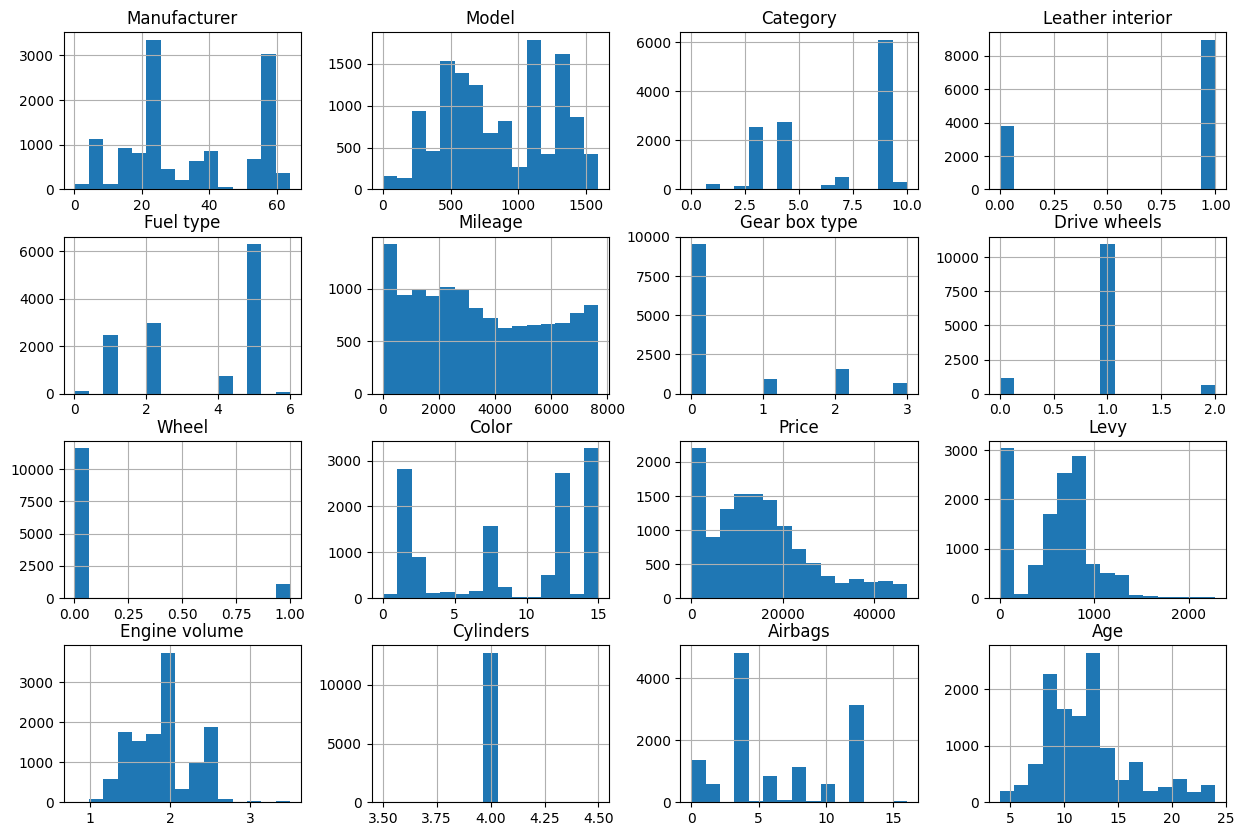

In [65]:
data.hist(bins=15,figsize=(15,10))
plt.show()

In [66]:
#Top 10 cars
Top_cars = df['Manufacturer'].value_counts().sort_values(ascending = False)[:10]
Top_cars

,count
Manufacturer,
HYUNDAI,3729
TOYOTA,3606
MERCEDES-BENZ,2043
FORD,1088
CHEVROLET,1047
BMW,1036
HONDA,960
LEXUS,927
NISSAN,645


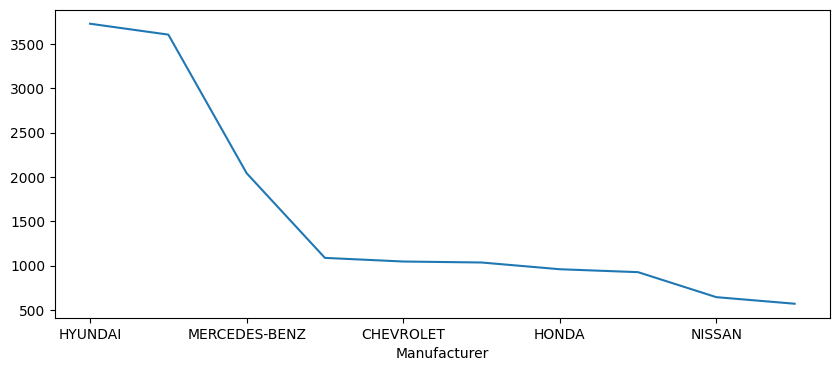

In [67]:
Top_cars.plot(figsize=(10,4))
plt.show()

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

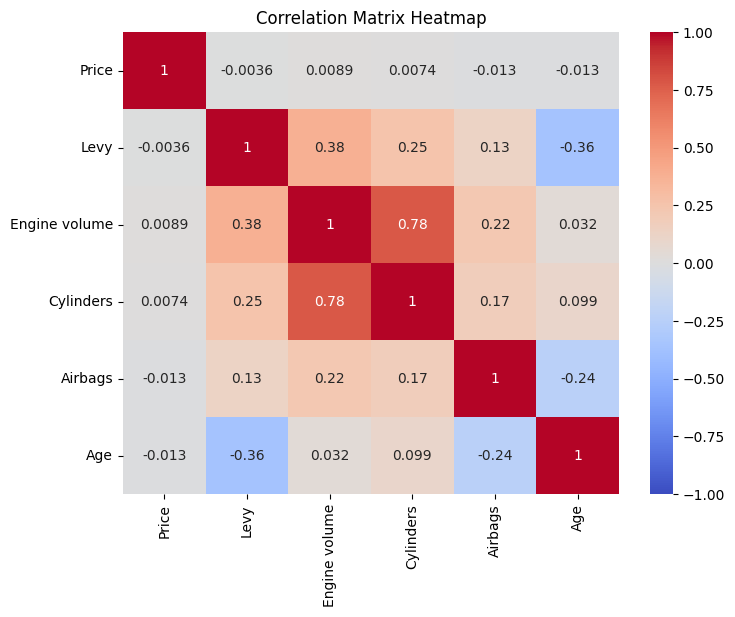

In [68]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')

In [69]:
#Display value counts for each string column
for col in string_columns.columns:
    print(f"\nValue counts for column '{col}':")
    print(string_columns[col].value_counts())

#Display unique value counts for each string column
for col in string_columns.columns:
    print(f"\nUnique values count for column '{col}': {string_columns[col].nunique()}")


Value counts for column 'Manufacturer':
Manufacturer
23    3729
58    3606
36    2043
16    1088
8     1047
      ... 
57       1
44       1
50       1
2        1
19       1
Name: count, Length: 65, dtype: int64

Value counts for column 'Model':
Model
1154    1069
1334    1067
435      929
633      910
601      534
        ... 
17         1
611        1
340        1
1132       1
1169       1
Name: count, Length: 1590, dtype: int64

Value counts for column 'Category':
Category
9     8600
4     5378
3     2799
7      633
1      528
10     361
6      299
2      229
8       51
0       35
5       11
Name: count, dtype: int64

Value counts for column 'Leather interior':
Leather interior
1    13731
0     5193
Name: count, dtype: int64

Value counts for column 'Fuel type':
Fuel type
5    9944
1    4001
2    3539
4     885
0     469
6      85
3       1
Name: count, dtype: int64

Value counts for column 'Mileage':
Mileage
0       714
3140    181
1856    159
2165    120
2700    117
       ... 
2

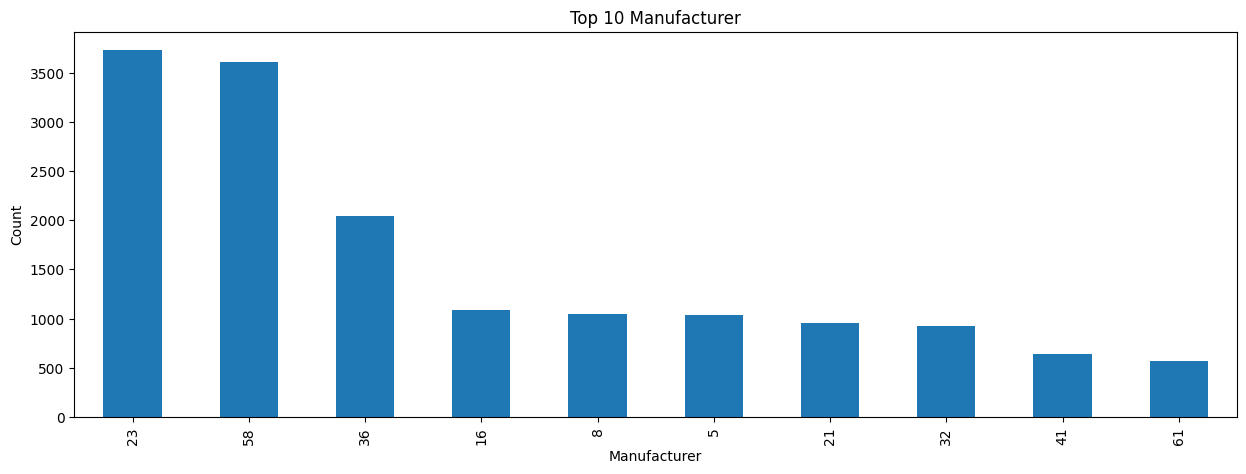

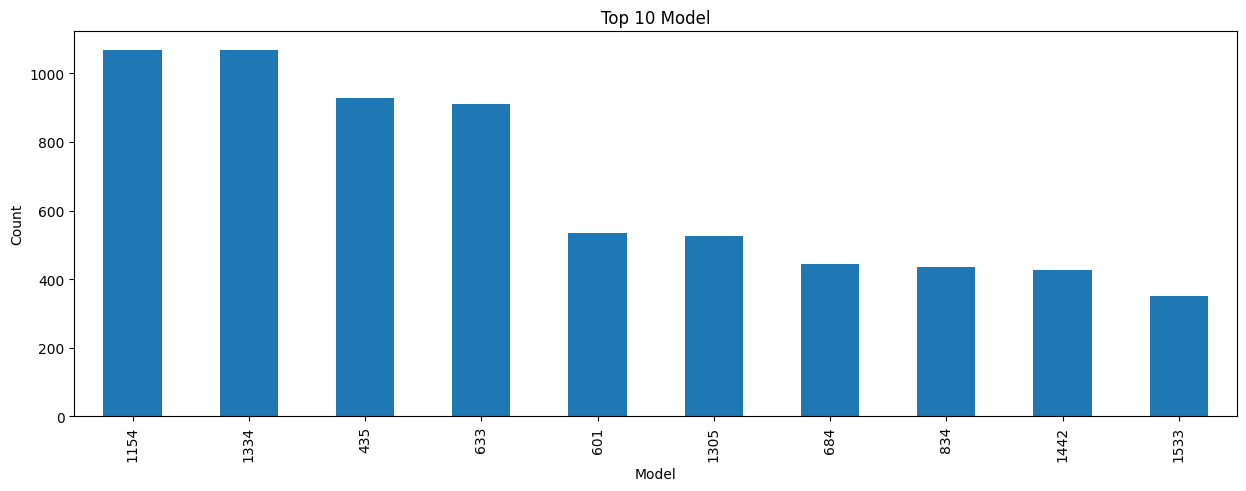

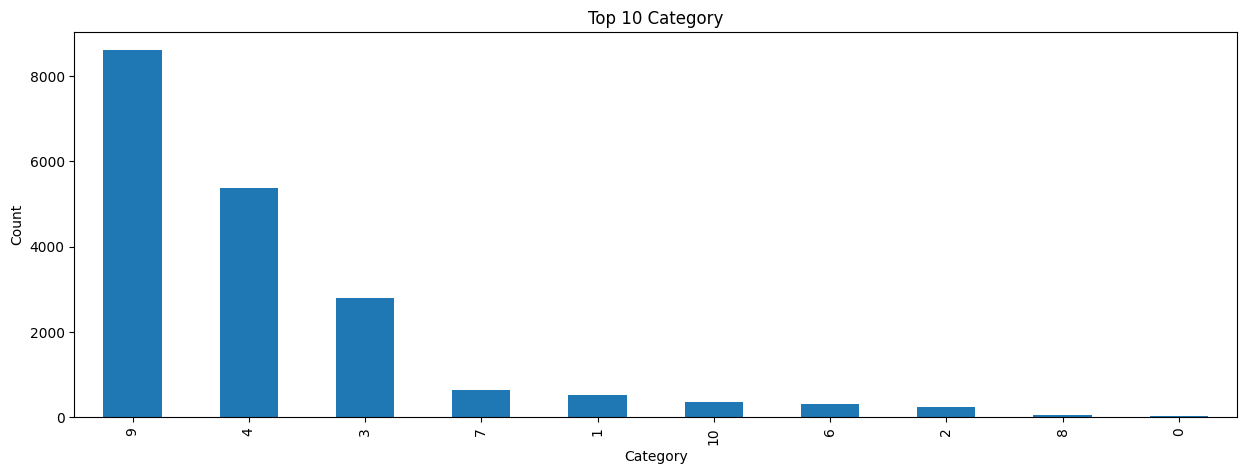

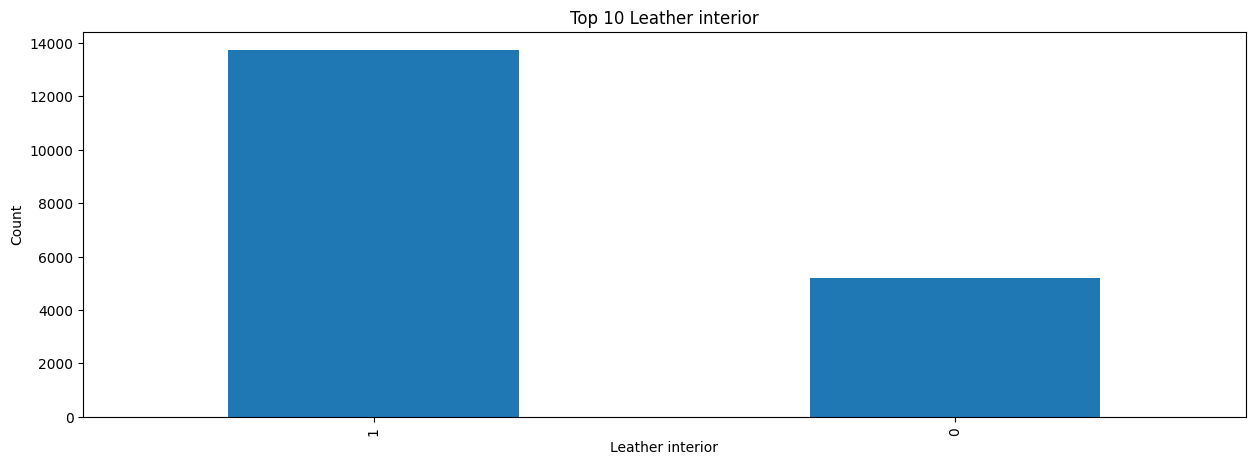

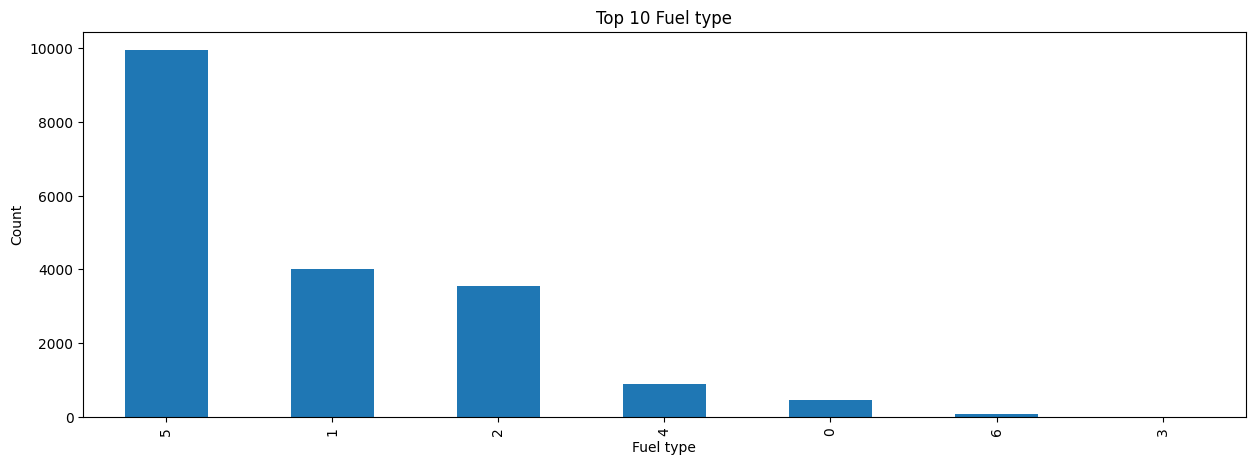

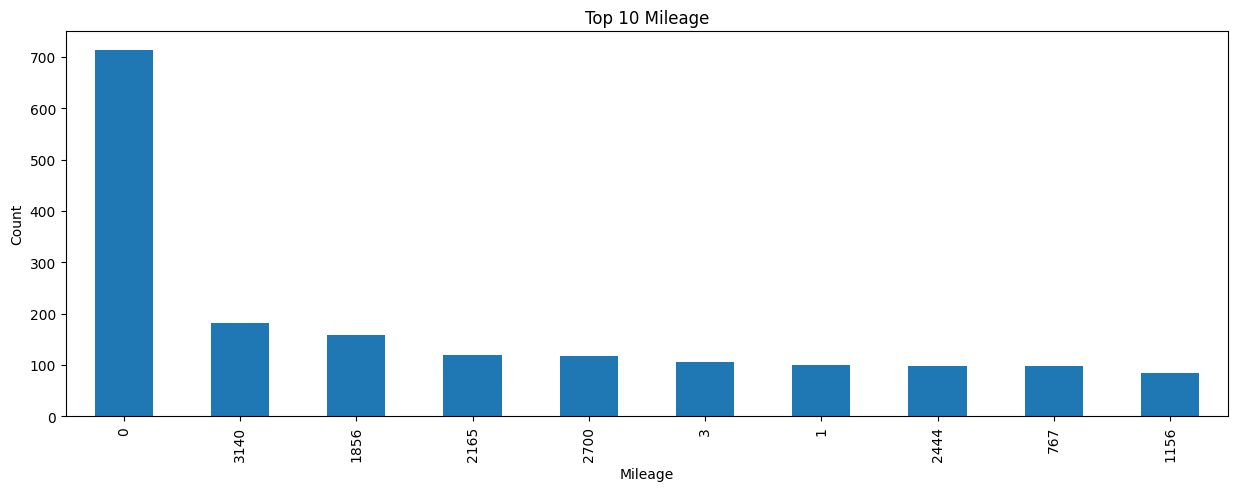

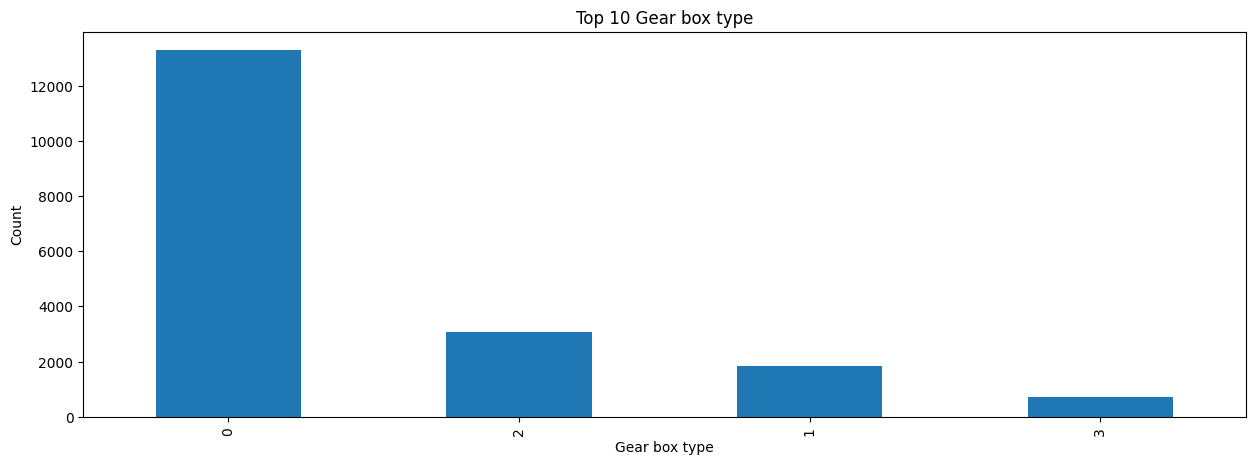

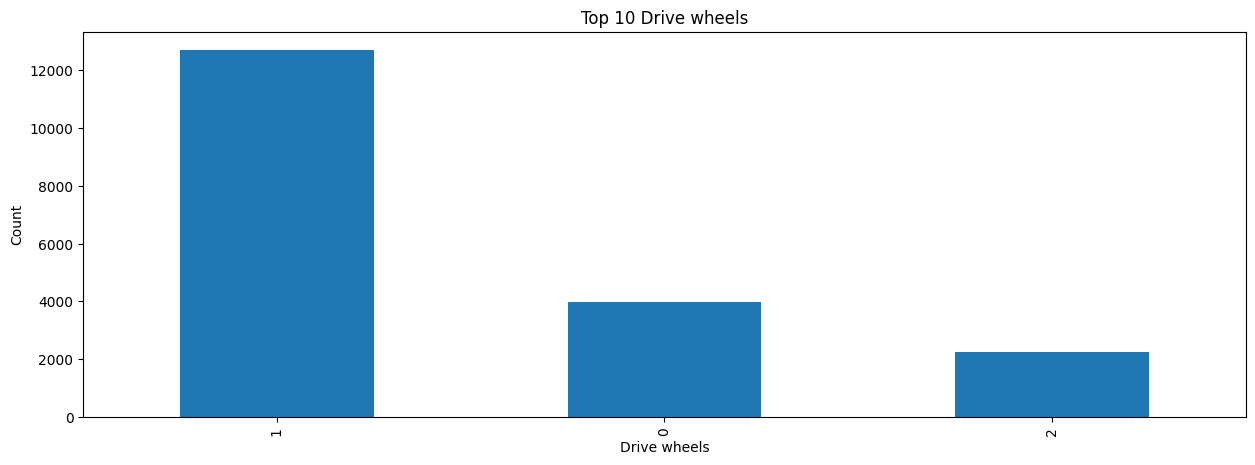

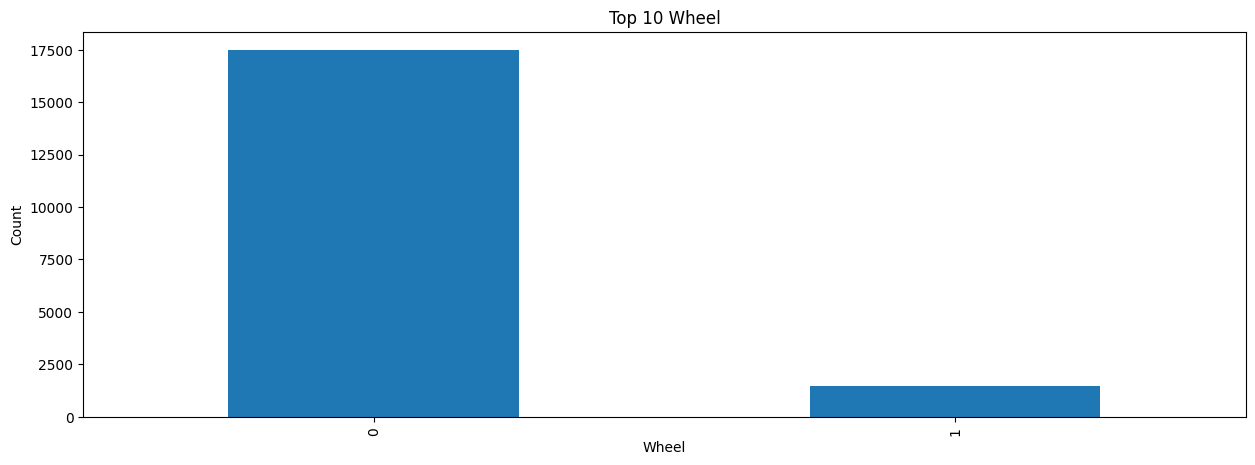

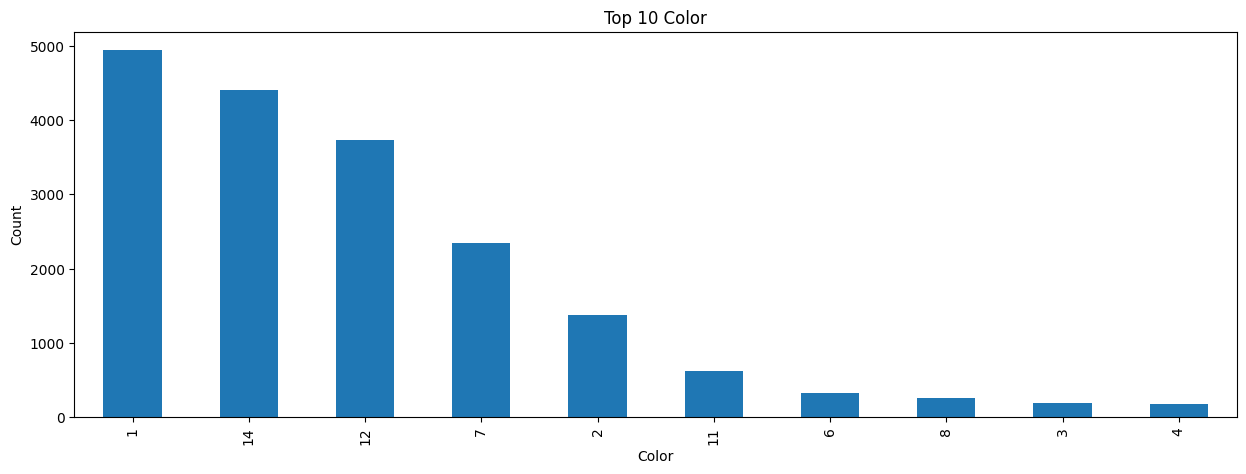

In [70]:
for i in string_columns.columns:
    plt.figure(figsize=(15, 5))  # Set figure size
    top_10 = string_columns[i].value_counts().head(10)  # Get top 10 value counts for column i
    top_10.plot(kind='bar')  # Plot as a bar chart
    plt.title('Top 10 ' + i)  # Set title
    plt.xlabel(i)  # Set x-axis label
    plt.ylabel('Count')  # Set y-axis label
    plt.show()  # Display the plot

<Axes: xlabel='Engine volume'>

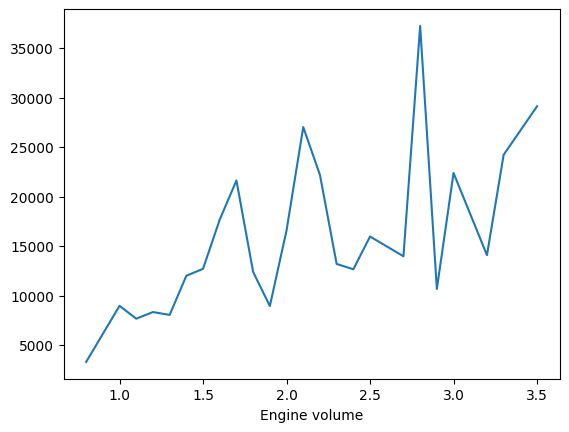

In [71]:
data.groupby("Engine volume")["Price"].mean().plot()


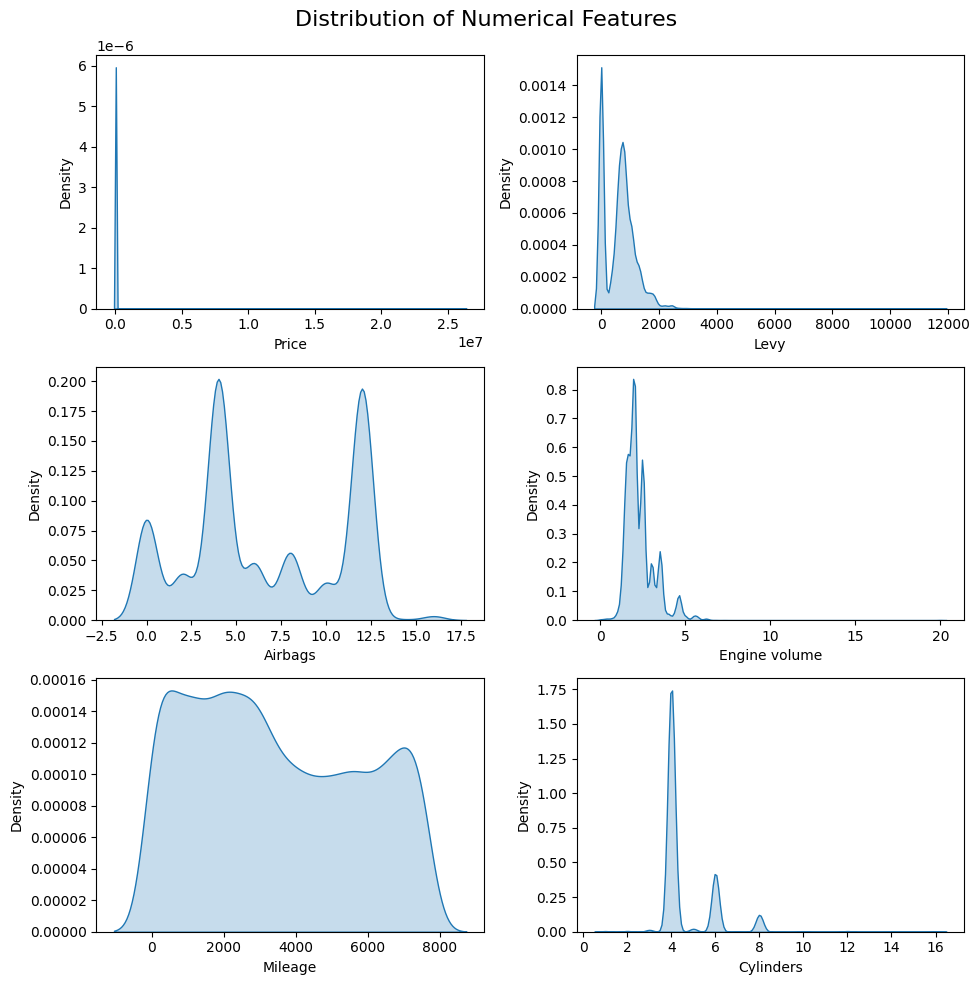

In [72]:
fig, axes = plt.subplots(3,2, figsize=(10, 10))

sns.kdeplot(numeric_columns['Price'], fill=True, ax=axes[0,0])
sns.kdeplot(numeric_columns["Levy"], fill=True, ax=axes[0,1])
sns.kdeplot(numeric_columns['Airbags'], fill=True, ax=axes[1,0])
sns.kdeplot(numeric_columns['Engine volume'], fill=True, ax=axes[1,1])
sns.kdeplot(data['Mileage'], fill=True, ax=axes[2,0])
sns.kdeplot(numeric_columns['Cylinders'], fill=True, ax=axes[2,1])

fig.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

In [73]:
#Average prices
average_prices = df.groupby('Age')['Price'].mean().reset_index()
average_prices[:10]

,Age,Price
0,4,63006.106383
1,5,30746.187500
2,6,35386.830957
3,7,26999.066950
4,8,28336.581781
5,9,20918.979699
6,10,17914.195694
7,11,16714.076320
8,12,15352.572970
9,13,14039.120101


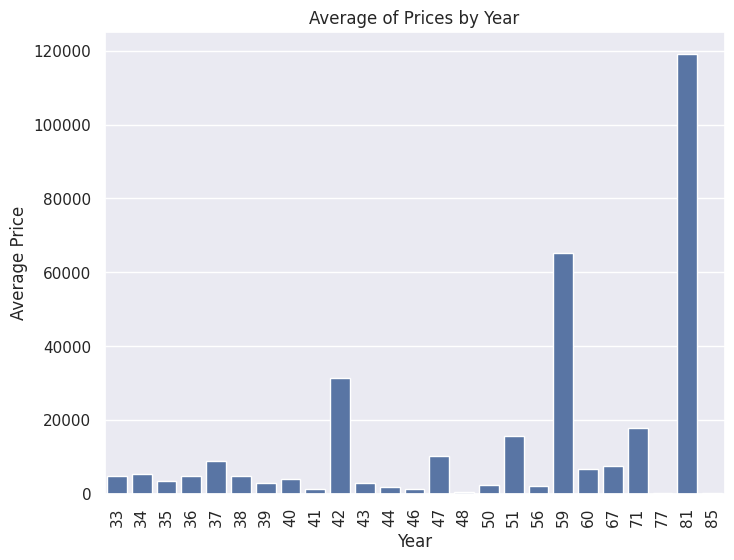

In [75]:
#Display Average price
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='Age', y='Price', data=average_prices.tail(25))
plt.title('Average of Prices by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=90)

plt.show()

In [76]:
# Find the year associated with the smallest and largest values in the 'Price' col
min_year = average_prices.loc[average_prices['Price'].idxmin(), 'Age']
max_year = average_prices.loc[average_prices['Price'].idxmax(), 'Age']

min_price = average_prices['Price'].min()
max_price = average_prices['Price'].max()

print(f"Smallest Price: {min_price} in : {min_year}")
print(f"Largest Price: {max_price} in  : {max_year}")

Smallest Price: 150.0 in : 77
Largest Price: 135935.48780487804 in  : 25


the score of the model is : 0.2265806403322238
the score of the model is : 0.609078285560933
the score of the model is : 0.7797946657219528
the score of the model is : 0.6568509446689517
the score of the model is : 0.7842814453426952
the score of the model is : -0.010344371120235563


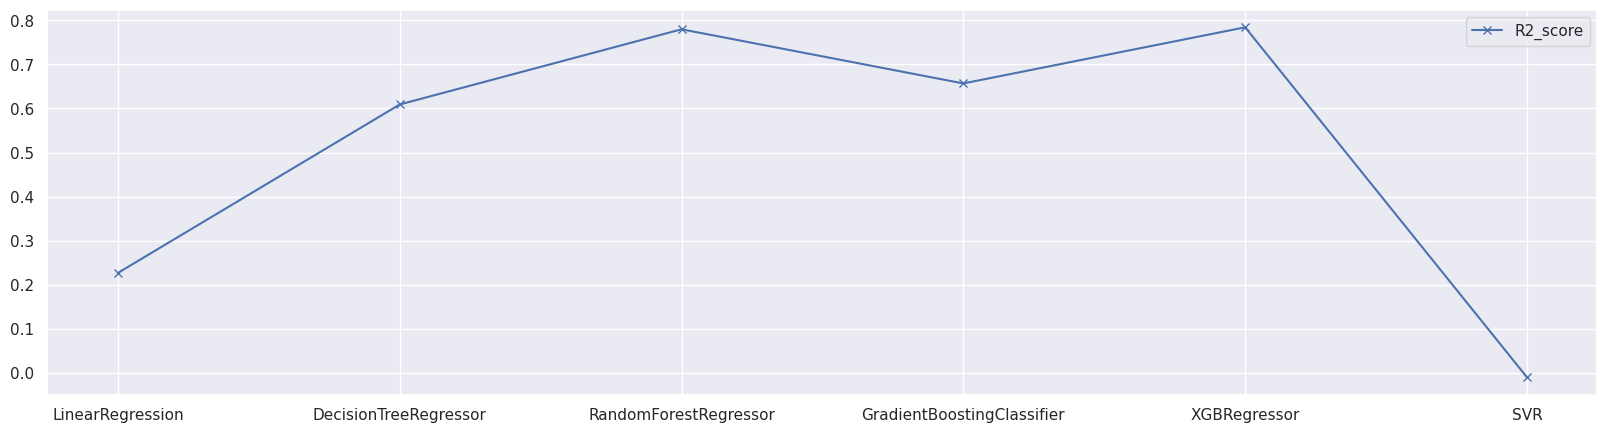

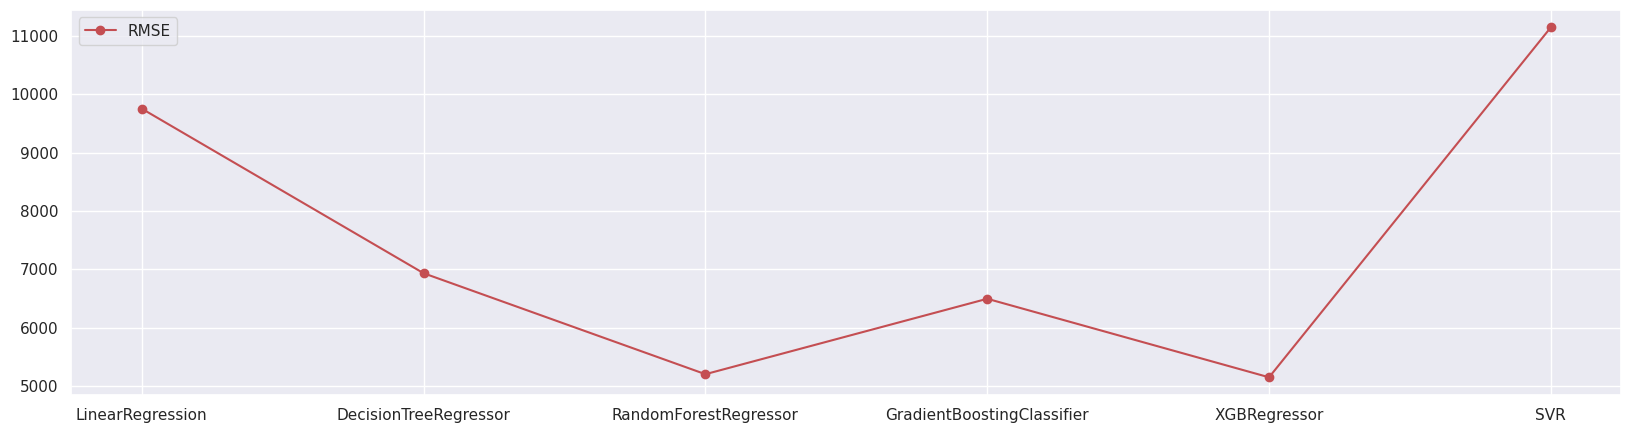

In [77]:
#Model
x = data.drop('Price', axis=1)
y = data['Price']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)



def models(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    R2.append(r2)
    rmse=np.sqrt(mean_squared_error(y_test,pre))
    RMSE.append(rmse)
    score=model.score(x_test,y_test)
    print(f"the score of the model is : {score}")



Algorithms=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingClassifier','XGBRegressor','SVR']
R2=[]
RMSE=[]


model1=LinearRegression()
model2=DecisionTreeRegressor(random_state=42)
model3=RandomForestRegressor()
model4=GradientBoostingRegressor()
model5=XGBRegressor()
model6=SVR()




models(model1)
models(model2)
models(model3)
models(model4)
models(model5)
models(model6)



df=pd.DataFrame({'Algorithms':Algorithms,'R2_score':R2,'RMSE':RMSE})
df


fig,sx=plt.subplots(figsize=(20,5))
plt.plot(df.Algorithms,df.R2_score,label='R2_score',marker='x')
plt.legend()
plt.show()



fig,sx=plt.subplots(figsize=(20,5))
plt.plot(df.Algorithms,df.RMSE,label='RMSE',c='r',marker='o')
plt.legend()
plt.show()






In [ ]:
#Using my model to Predict new data
import pickle
file_name='car_prediction.sav'
pickle.dump(model3,open(file_name,'wb'))
